In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


In [11]:
data = pd.read_csv("data/credits.csv")
movies = pd.read_csv("data/tmdb_5000_credits.csv")
merged = pd.merge(data, movies, left_on="person_id", right_on="movie_id")
merged.head(100)

,person_id,id,name,character,role,movie_id,title,cast,crew
0,9451,tm84618,Charles Scorsese,Iris' Father (newspaper article) (uncredited),ACTOR,9451,Election,"[{""cast_id"": 8, ""character"": ""Jim McAllister"",...","[{""credit_id"": ""563a29ebc3a3681b59021702"", ""de..."
1,6639,tm154986,Ned Beatty,Bobby Trippe,ACTOR,6639,Love in the Time of Cholera,"[{""cast_id"": 17, ""character"": ""Florentino Ariz...","[{""credit_id"": ""52fe4461c3a36847f8092731"", ""de..."
2,11478,tm127384,Carol Cleveland,Zoot / Dingo,ACTOR,11478,The Skulls,"[{""cast_id"": 9, ""character"": ""Lucas \""Luke\"" M...","[{""credit_id"": ""52fe44489251416c7502f3a9"", ""de..."
3,14351,tm120801,Jim Brown,Robert Jefferson,ACTOR,14351,Crossover,"[{""cast_id"": 1, ""character"": ""Tech"", ""credit_i...","[{""credit_id"": ""56a4d4059251410c08004969"", ""de..."
4,24126,tm120801,Robert Ryan,Col. Everett Dasher Breed,ACTOR,24126,Warlock: The Armageddon,"[{""cast_id"": 1, ""character"": ""Warlock"", ""credi...","[{""credit_id"": ""52fe4483c3a368484e0276a3"", ""de..."
...,...,...,...,...,...,...,...,...,...
95,338,ts20983,Miki Nagasawa,Maya Ibuki (voice),ACTOR,338,"Good bye, Lenin!","[{""cast_id"": 4, ""character"": ""Alexander 'Alex'...","[{""credit_id"": ""52fe4239c3a36847f800d9c5"", ""de..."
96,9303,tm192405,Ethan Hawke,Vincent Freeman,ACTOR,9303,Bound,"[{""cast_id"": 1, ""character"": ""Violet"", ""credit...","[{""credit_id"": ""54f052b8c3a3686d580079ef"", ""de..."
97,4517,tm192405,Jude Law,Jerome Eugene Morrow,ACTOR,4517,Elizabeth: The Golden Age,"[{""cast_id"": 5, ""character"": ""Elizabeth I"", ""c...","[{""credit_id"": ""52fe43c8c3a36847f806f1b9"", ""de..."
98,9304,tm192405,Alan Arkin,Detective Hugo,ACTOR,9304,Multiplicity,"[{""cast_id"": 11, ""character"": ""Doug Kinney"", ""...","[{""credit_id"": ""52fe44e4c3a36847f80b0553"", ""de..."


In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  1994 non-null   int64 
 1   id         1994 non-null   object
 2   name       1994 non-null   object
 3   character  1863 non-null   object
 4   role       1994 non-null   object
 5   movie_id   1994 non-null   int64 
 6   title      1994 non-null   object
 7   cast       1994 non-null   object
 8   crew       1994 non-null   object
dtypes: int64(2), object(7)
memory usage: 140.3+ KB


In [33]:
merged.describe()

,person_id,movie_id
count,1994.000000,1994.000000
mean,18989.264794,18989.264794
std,38202.062840,38202.062840
min,11.000000,11.000000
25%,2142.000000,2142.000000
50%,9562.000000,9562.000000
75%,14175.000000,14175.000000
max,325140.000000,325140.000000


In [32]:
merged.isna().mean().sort_values(ascending=False)
merged.duplicated().sum()

np.int64(0)

In [61]:
actor_counts = (merged.groupby('name')['movie_id']
                .nunique()
                .sort_values(ascending=False))

In [48]:
actors_df = merged[merged["role"] == "ACTOR"]
actor_counts = actors_df["name"].value_counts()


actor_counts.head()

top_actors = actor_counts.head(10).reset_index()
top_actors.columns = ["actor", "count"]
top_actors

,actor,count
0,Yuki Kaji,19
1,Jun Fukuyama,14
2,Rikiya Koyama,13
3,Samuel L. Jackson,12
4,Mike Epps,12
5,Akio Otsuka,12
6,Mariya Ise,11
7,Romi Park,10
8,Andrew Bachelor,9
9,Will Forte,9


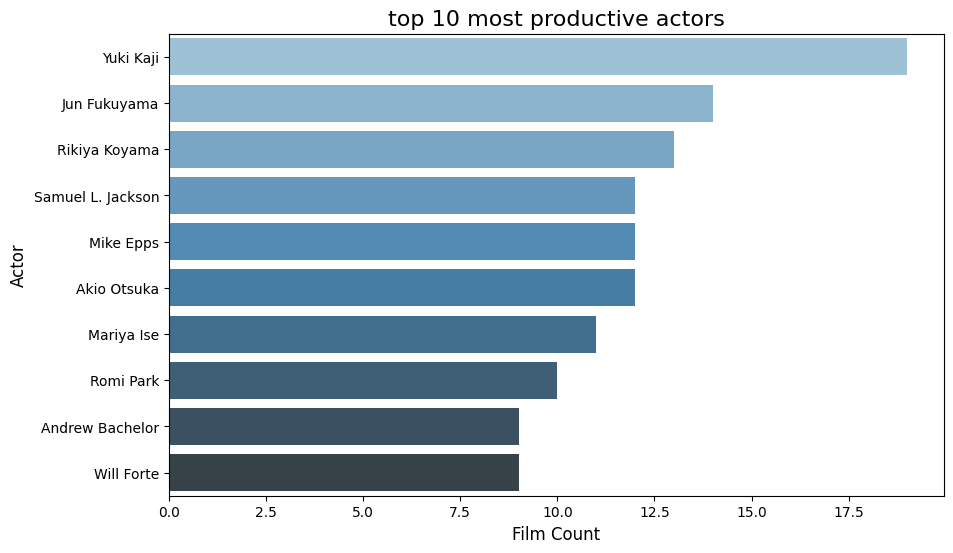

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x="count", y="actor", data=top_actors, hue="actor", palette="Blues_d", legend=False)
plt.title("top 10 most productive actors", fontsize=16)
plt.xlabel("Film Count", fontsize=12)
plt.ylabel("Actor", fontsize=12)
plt.show()

In [67]:
merged["role"].unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [77]:
merged[merged["role"] == "DIRECTOR"].shape[0]


83

In [83]:
top_director = merged[merged["role"] == "DIRECTOR"]
Director_counts = top_director["name"].value_counts()
top_director = Director_counts.head().reset_index()
top_director.columns = ["director", "count"]
top_director

,director,count
0,Paul Thomas Anderson,3
1,Christopher Nolan,3
2,Steven Spielberg,3
3,Roger Kumble,3
4,Keishi Ōtomo,3


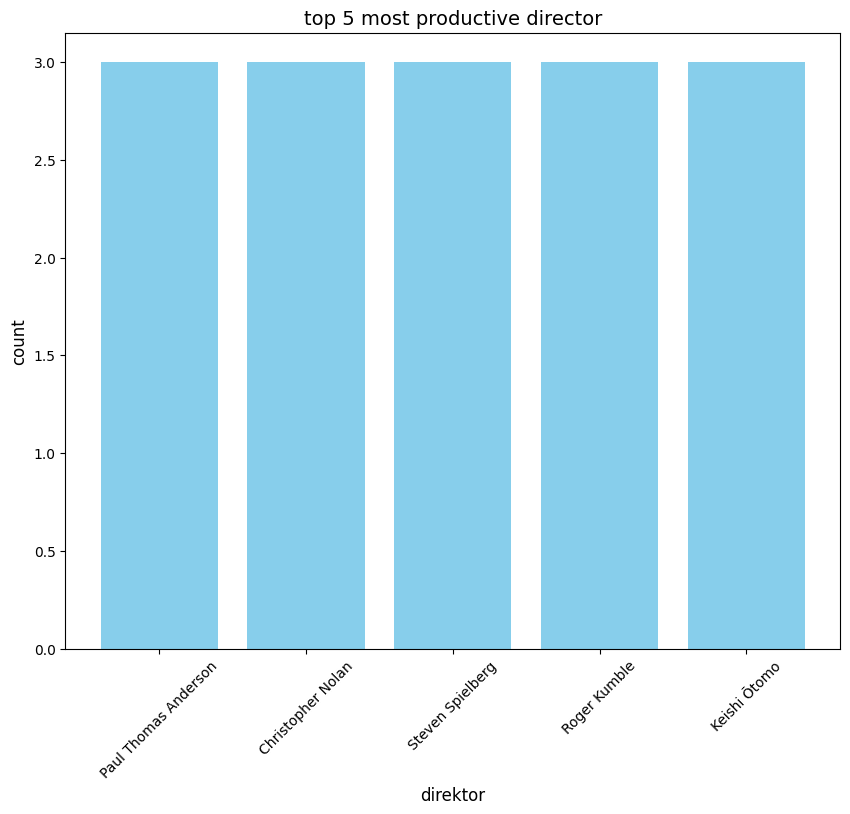

In [87]:
plt.figure(figsize=(10,8))
plt.bar(top_director["director"], top_director["count"], color="skyblue")
plt.title("top 5 most productive director", fontsize=14)
plt.xlabel("direktor", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [79]:
merged.head()

,person_id,id,name,character,role,movie_id,title,cast,crew
0,9451,tm84618,Charles Scorsese,Iris' Father (newspaper article) (uncredited),ACTOR,9451,Election,"[{""cast_id"": 8, ""character"": ""Jim McAllister"",...","[{""credit_id"": ""563a29ebc3a3681b59021702"", ""de..."
1,6639,tm154986,Ned Beatty,Bobby Trippe,ACTOR,6639,Love in the Time of Cholera,"[{""cast_id"": 17, ""character"": ""Florentino Ariz...","[{""credit_id"": ""52fe4461c3a36847f8092731"", ""de..."
2,11478,tm127384,Carol Cleveland,Zoot / Dingo,ACTOR,11478,The Skulls,"[{""cast_id"": 9, ""character"": ""Lucas \""Luke\"" M...","[{""credit_id"": ""52fe44489251416c7502f3a9"", ""de..."
3,14351,tm120801,Jim Brown,Robert Jefferson,ACTOR,14351,Crossover,"[{""cast_id"": 1, ""character"": ""Tech"", ""credit_i...","[{""credit_id"": ""56a4d4059251410c08004969"", ""de..."
4,24126,tm120801,Robert Ryan,Col. Everett Dasher Breed,ACTOR,24126,Warlock: The Armageddon,"[{""cast_id"": 1, ""character"": ""Warlock"", ""credi...","[{""credit_id"": ""52fe4483c3a368484e0276a3"", ""de..."


In [27]:
merged.isnull()

,person_id,id,name,character,role,movie_id,title,cast,crew
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1989,False,False,False,True,False,False,False,False,False
1990,False,False,False,False,False,False,False,False,False
1991,False,False,False,False,False,False,False,False,False
1992,False,False,False,True,False,False,False,False,False


In [ ]:
merged['role'].unique()

In [ ]:
jumlah_bms = 500
hari_bms = "rabu"
berat_bms = 110
barang_baru = True

In [ ]:
print(jumlah_bms, type(jumlah_bms))
print(hari_bms, type(hari_bms))
print(berat_bms, type(berat_bms))
print(barang_baru, type(barang_baru))
